<a href="https://colab.research.google.com/github/sergio191699-ship-it/mi-repositorio_tarea1/blob/main/RECURRENTE/RED_NEURONAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ============================================================================
# CELDA 1: CONFIGURACIÓN INICIAL Y LIBRERÍAS
# ============================================================================
# Instalación e importación de herramientas necesarias

# Instalar librería para descargar datos financieros
!pip install yfinance --quiet

# Importar librerías básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Importar TensorFlow/Keras para la red neuronal
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Importar herramientas para preprocesamiento y evaluación
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("Librerías importadas correctamente")
print(f"Versión de TensorFlow: {tf.__version__}")

Librerías importadas correctamente
Versión de TensorFlow: 2.19.0


In [2]:
# ============================================================================
# CELDA 2: OBTENCIÓN DE DATOS
# ============================================================================
# Descarga de datos históricos de precios de acciones

import yfinance as yf

# Definir el símbolo de la acción y período de tiempo
accion = "AAPL"  # Apple Inc.
fecha_inicio = "2019-01-01"
fecha_fin = "2023-12-31"

# Descargar datos históricos
print("Descargando datos de Apple (AAPL)...")
datos = yf.download(accion, start=fecha_inicio, end=fecha_fin)

# Mostrar información básica del dataset
print(f"\nInformación del dataset:")
print(f"Número de días: {len(datos)}")
print(f"Columnas disponibles: {list(datos.columns)}")
print("\nPrimeras 5 filas:")
print(datos.head())

Descargando datos de Apple (AAPL)...


[*********************100%***********************]  1 of 1 completed


Información del dataset:
Número de días: 1258
Columnas disponibles: [('Close', 'AAPL'), ('High', 'AAPL'), ('Low', 'AAPL'), ('Open', 'AAPL'), ('Volume', 'AAPL')]

Primeras 5 filas:
Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2019-01-02  37.538826  37.759896  36.661683  36.818571  148158800
2019-01-03  33.799671  34.638779  33.754506  34.225167  365248800
2019-01-04  35.242565  35.311502  34.182390  34.355916  234428400
2019-01-07  35.164108  35.378047  34.681562  35.347144  219111200
2019-01-08  35.834450  36.088799  35.304362  35.551577  164101200


Verificando datos cargados...
Tamaño de los datos: (1258, 5)
Columnas disponibles: [('Close', 'AAPL'), ('High', 'AAPL'), ('Low', 'AAPL'), ('Open', 'AAPL'), ('Volume', 'AAPL')]


TypeError: only length-1 arrays can be converted to Python scalars

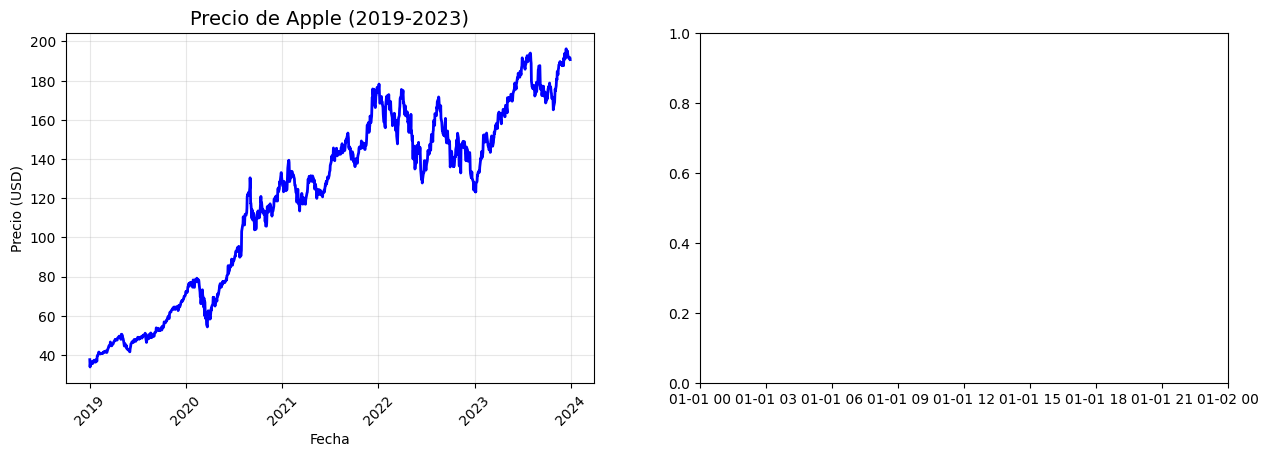

In [7]:
# ============================================================================
# CELDA 3: ANÁLISIS EXPLORATORIO DE DATOS
# ============================================================================
# Visualización y comprensión de los datos

# Verificar que los datos se cargaron correctamente
print("Verificando datos cargados...")
print(f"Tamaño de los datos: {datos.shape}")
print(f"Columnas disponibles: {list(datos.columns)}")

# Crear figura para las gráficas
fig = plt.figure(figsize=(15, 10))

# Gráfica 1: Precio de cierre a lo largo del tiempo
ax1 = plt.subplot(2, 2, 1)
ax1.plot(datos.index, datos['Close'], color='blue', linewidth=2)
ax1.set_title('Precio de Apple (2019-2023)', fontsize=14)
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Precio (USD)')
ax1.grid(True, alpha=0.3)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

# Gráfica 2: Volumen de trading
ax2 = plt.subplot(2, 2, 2)
ax2.bar(datos.index, datos['Volume'], color='green', alpha=0.6)
ax2.set_title('Volumen de Transacciones', fontsize=14)
ax2.set_xlabel('Fecha')
ax2.set_ylabel('Volumen')
ax2.grid(True, alpha=0.3)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

# Gráfica 3: Distribución de cambios diarios
ax3 = plt.subplot(2, 2, 3)
# Calcular cambio porcentual diario
datos['Daily_Return'] = datos['Close'].pct_change() * 100
ax3.hist(datos['Daily_Return'].dropna(), bins=50, color='purple', edgecolor='black', alpha=0.7)
media_cambio = datos['Daily_Return'].mean()
ax3.axvline(x=media_cambio, color='red', linestyle='--', linewidth=2, label=f'Media: {media_cambio:.2f}%')
ax3.set_title('Distribución de Cambios Diarios', fontsize=14)
ax3.set_xlabel('Cambio (%)')
ax3.set_ylabel('Frecuencia')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Gráfica 4: Relación precio-volumen
ax4 = plt.subplot(2, 2, 4)
ax4.scatter(datos['Close'], datos['Volume'], alpha=0.5, color='orange')
ax4.set_title('Relación Precio vs Volumen', fontsize=14)
ax4.set_xlabel('Precio de Cierre (USD)')
ax4.set_ylabel('Volumen')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Estadísticas descriptivas
print("\n" + "="*60)
print("ESTADÍSTICAS DESCRIPTIVAS DEL PRECIO DE APPLE")
print("="*60)

# Calcular estadísticas básicas
precio_promedio = datos['Close'].mean()
precio_max = datos['Close'].max()
precio_min = datos['Close'].min()
precio_actual = datos['Close'].iloc[-1]
volatilidad = datos['Daily_Return'].std()

print(f"Precio promedio: ${precio_promedio:.2f}")
print(f"Precio máximo: ${precio_max:.2f}")
print(f"Precio mínimo: ${precio_min:.2f}")
print(f"Precio actual: ${precio_actual:.2f}")
print(f"Volatilidad diaria (desviación estándar): {volatilidad:.2f}%")
print(f"Rango de fechas: {datos.index[0].date()} a {datos.index[-1].date()}")
print(f"Total de días analizados: {len(datos)}")
print(f"Días con datos completos: {datos['Close'].count()}")

# Información adicional sobre volatilidad
print("\n" + "="*60)
print("ANÁLISIS DE VOLATILIDAD")
print("="*60)
print(f"Cambio promedio diario: {media_cambio:.2f}%")
print(f"Días con ganancias: {(datos['Daily_Return'] > 0).sum()}")
print(f"Días con pérdidas: {(datos['Daily_Return'] < 0).sum()}")
print(f"Días sin cambio: {(datos['Daily_Return'] == 0).sum()}")

# Limpiar columna temporal creada para el análisis
datos.drop('Daily_Return', axis=1, inplace=True)

In [8]:
# ============================================================================
# CELDA 4: PREPROCESAMIENTO DE DATOS
# ============================================================================
# Preparación de datos para la red neuronal

# Seleccionar solo la columna de precio de cierre
precios = datos[['Close']].values

# Normalizar los datos entre 0 y 1
scaler = MinMaxScaler(feature_range=(0, 1))
precios_normalizados = scaler.fit_transform(precios)

# Dividir datos en entrenamiento (80%) y prueba (20%)
tamaño_entrenamiento = int(len(precios_normalizados) * 0.8)
datos_entrenamiento = precios_normalizados[:tamaño_entrenamiento]
datos_prueba = precios_normalizados[tamaño_entrenamiento:]

print(f"Datos originales: {len(precios)} días")
print(f"Entrenamiento: {len(datos_entrenamiento)} días ({len(datos_entrenamiento)/len(precios)*100:.0f}%)")
print(f"Prueba: {len(datos_prueba)} días ({len(datos_prueba)/len(precios)*100:.0f}%)")

# Función para crear secuencias de datos
def crear_secuencias(datos, dias_historia=60):
    """
    Crea secuencias de datos para entrenamiento de LSTM.
    Cada secuencia contiene 'dias_historia' días consecutivos
    y trata de predecir el día siguiente.
    """
    X, y = [], []

    for i in range(len(datos) - dias_historia - 1):
        X.append(datos[i:i + dias_historia])
        y.append(datos[i + dias_historia])

    return np.array(X), np.array(y)

# Crear secuencias
DIAS_HISTORIA = 60
X_entrenamiento, y_entrenamiento = crear_secuencias(datos_entrenamiento, DIAS_HISTORIA)
X_prueba, y_prueba = crear_secuencias(datos_prueba, DIAS_HISTORIA)

print(f"\nSecuencias creadas:")
print(f"X_entrenamiento shape: {X_entrenamiento.shape}")
print(f"y_entrenamiento shape: {y_entrenamiento.shape}")
print(f"X_prueba shape: {X_prueba.shape}")
print(f"y_prueba shape: {y_prueba.shape}")

Datos originales: 1258 días
Entrenamiento: 1006 días (80%)
Prueba: 252 días (20%)

Secuencias creadas:
X_entrenamiento shape: (945, 60, 1)
y_entrenamiento shape: (945, 1)
X_prueba shape: (191, 60, 1)
y_prueba shape: (191, 1)


In [9]:
# ============================================================================
# CELDA 5: CONSTRUCCIÓN DEL MODELO LSTM
# ============================================================================
# Creación de la arquitectura de la red neuronal recurrente

# Definir la forma de entrada
forma_entrada = (X_entrenamiento.shape[1], X_entrenamiento.shape[2])

# Crear modelo secuencial
modelo = Sequential()

# Primera capa LSTM
modelo.add(LSTM(
    units=50,
    return_sequences=True,
    input_shape=forma_entrada
))

# Capa Dropout para regularización
modelo.add(Dropout(0.2))

# Segunda capa LSTM
modelo.add(LSTM(
    units=25,
    return_sequences=False
))

# Capa Dropout adicional
modelo.add(Dropout(0.2))

# Capa de salida
modelo.add(Dense(units=1))

# Compilar el modelo
modelo.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mae']
)

print("Modelo LSTM construido:")
modelo.summary()

Modelo LSTM construido:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 25)             │         7,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,026 (70.41 KB)

 Trainable params: 18,026 (70.41 KB)

 Non-trainable params: 0 (0.00 B)

Iniciando entrenamiento del modelo...
Datos de entrenamiento: 945 secuencias
Épocas máximas: 50
Tamaño de lote: 32
Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0064 - mae: 0.0684 - val_loss: 0.0018 - val_mae: 0.0328 - learning_rate: 0.0010
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0153 - mae: 0.1055 - val_loss: 0.0018 - val_mae: 0.0344 - learning_rate: 0.0010
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0137 - mae: 0.1016 - val_loss: 0.0073 - val_mae: 0.0779 - learning_rate: 0.0010
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0108 - mae: 0.0909 - val_loss: 0.0066 - val_mae: 0.0733 - learning_rate: 0.0010
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0041 - mae: 0.0538 - val_loss: 0.0045 - val_mae: 0.0591 - learning_rate: 0.0010
Epoch 6/50
25/27 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0026 - mae: 0.0343
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
27/27 ━━━━━━━━━━━━━━━━━━

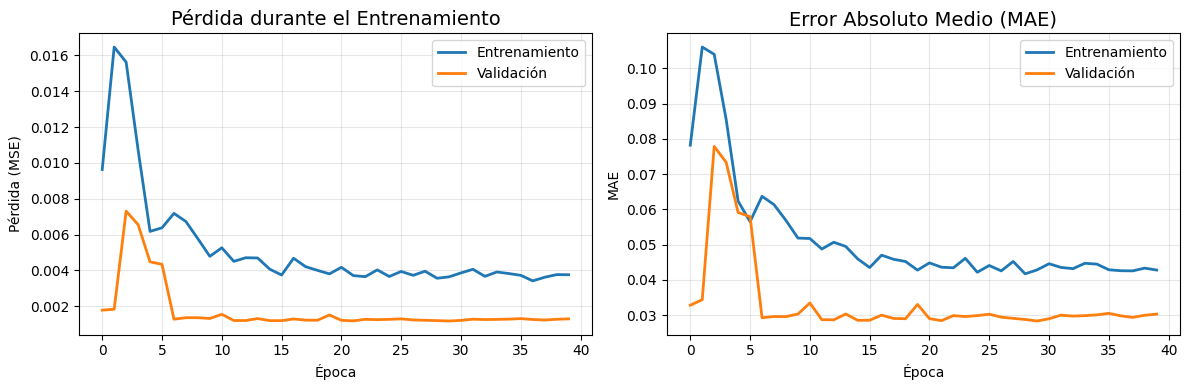

In [10]:
# ============================================================================
# CELDA 6: ENTRENAMIENTO DEL MODELO
# ============================================================================
# Entrenamiento de la red neuronal con los datos

# Configurar callbacks para mejorar el entrenamiento
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=0.00001,
        verbose=1
    )
]

print("Iniciando entrenamiento del modelo...")
print(f"Datos de entrenamiento: {X_entrenamiento.shape[0]} secuencias")
print(f"Épocas máximas: 50")
print(f"Tamaño de lote: 32")

# Entrenar el modelo
historia = modelo.fit(
    X_entrenamiento, y_entrenamiento,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    callbacks=callbacks,
    verbose=1,
    shuffle=False
)

print(f"\nEntrenamiento completado en {len(historia.history['loss'])} épocas")
print(f"Mejor pérdida de validación: {min(historia.history['val_loss']):.6f}")

# Visualizar el progreso del entrenamiento
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(historia.history['loss'], label='Entrenamiento', linewidth=2)
plt.plot(historia.history['val_loss'], label='Validación', linewidth=2)
plt.title('Pérdida durante el Entrenamiento', fontsize=14)
plt.xlabel('Época')
plt.ylabel('Pérdida (MSE)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(historia.history['mae'], label='Entrenamiento', linewidth=2)
plt.plot(historia.history['val_mae'], label='Validación', linewidth=2)
plt.title('Error Absoluto Medio (MAE)', fontsize=14)
plt.xlabel('Época')
plt.ylabel('MAE')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [11]:
# ============================================================================
# CELDA 7: EVALUACIÓN DEL MODELO
# ============================================================================
# Evaluación del modelo con datos de prueba

# Hacer predicciones con el conjunto de prueba
predicciones_normalizadas = modelo.predict(X_prueba)

# Convertir predicciones a valores originales (USD)
y_prueba_real = scaler.inverse_transform(y_prueba.reshape(-1, 1)).flatten()
predicciones_reales = scaler.inverse_transform(predicciones_normalizadas).flatten()

# Calcular métricas de error
mae = mean_absolute_error(y_prueba_real, predicciones_reales)
mse = mean_squared_error(y_prueba_real, predicciones_reales)
rmse = np.sqrt(mse)

print("Resultados en datos de prueba:")
print(f"MAE (Error Absoluto Medio): ${mae:.2f}")
print(f"MSE (Error Cuadrático Medio): ${mse:.2f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): ${rmse:.2f}")
print(f"\nPrecio promedio real: ${y_prueba_real.mean():.2f}")
print(f"Error relativo: {(rmse / y_prueba_real.mean() * 100):.1f}%")

# Calcular precisión direccional
cambios_reales = np.sign(np.diff(y_prueba_real))
cambios_predichos = np.sign(np.diff(predicciones_reales))
precision_direccional = np.mean(cambios_reales == cambios_predichos) * 100

print(f"\nPrecisión direccional: {precision_direccional:.1f}%")
print(f"(Porcentaje de veces que predice correctamente si sube o baja)")

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step
Resultados en datos de prueba:
MAE (Error Absoluto Medio): $6.52
MSE (Error Cuadrático Medio): $55.46
RMSE (Raíz del Error Cuadrático Medio): $7.45

Precio promedio real: $178.29
Error relativo: 4.2%

Precisión direccional: 48.4%
(Porcentaje de veces que predice correctamente si sube o baja)


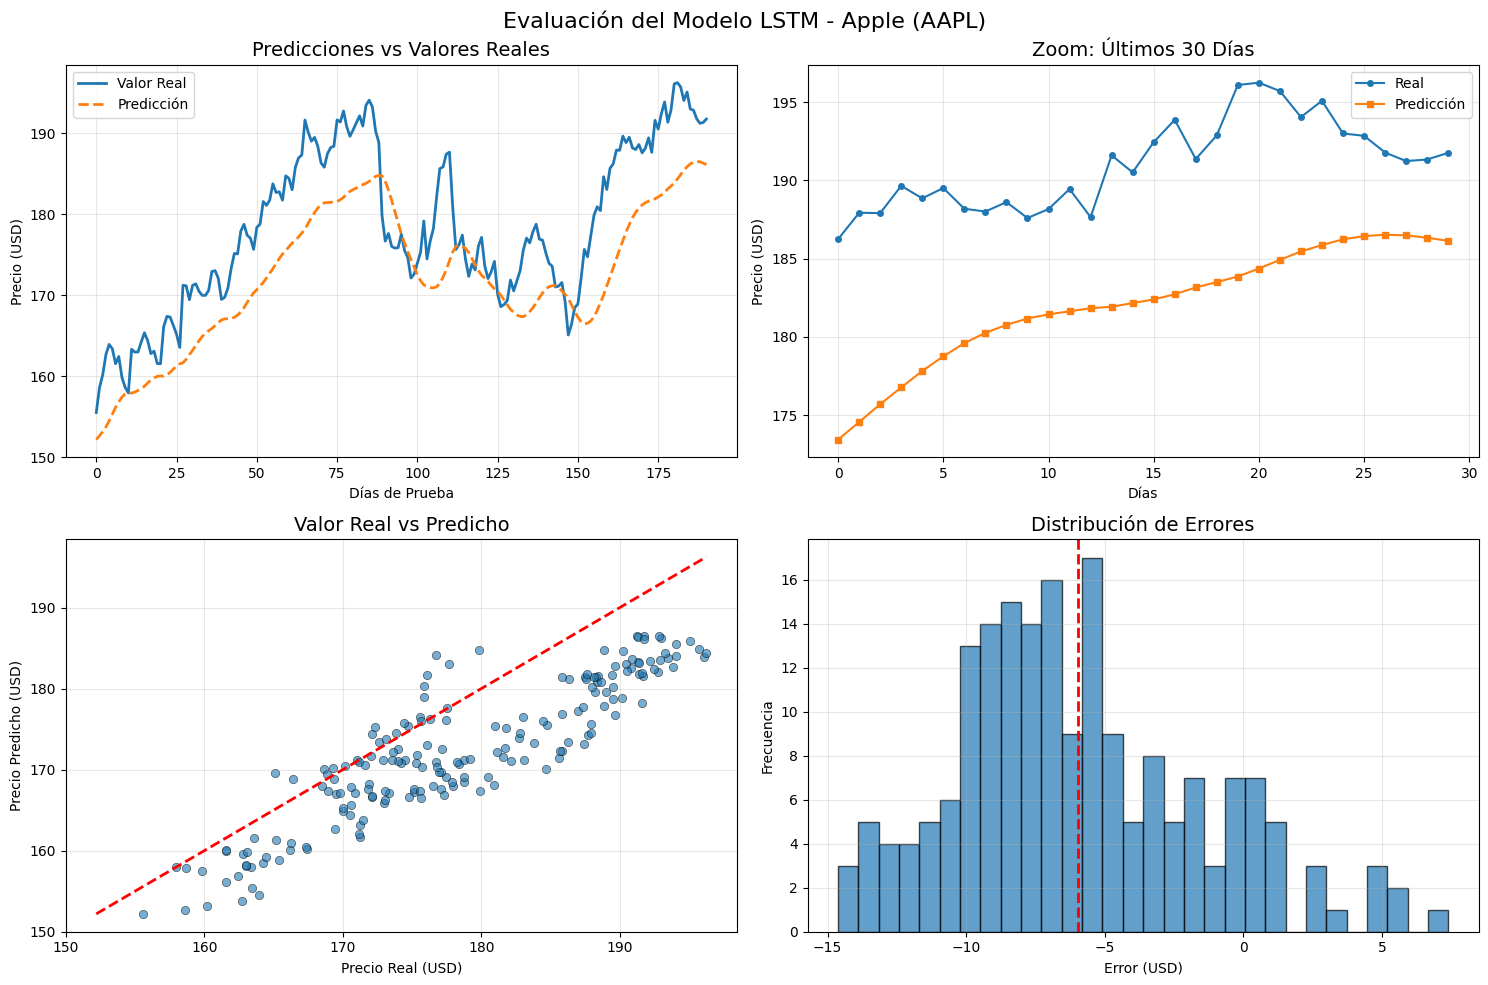

In [12]:
# ============================================================================
# CELDA 8: VISUALIZACIÓN DE RESULTADOS
# ============================================================================
# Gráficas para entender el rendimiento del modelo

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Gráfica 1: Predicciones vs valores reales
axes[0, 0].plot(y_prueba_real, label='Valor Real', linewidth=2)
axes[0, 0].plot(predicciones_reales, label='Predicción', linewidth=2, linestyle='--')
axes[0, 0].set_title('Predicciones vs Valores Reales', fontsize=14)
axes[0, 0].set_xlabel('Días de Prueba')
axes[0, 0].set_ylabel('Precio (USD)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Gráfica 2: Zoom en los últimos 30 días
ultimos_30 = 30
axes[0, 1].plot(y_prueba_real[-ultimos_30:], label='Real', marker='o', markersize=4)
axes[0, 1].plot(predicciones_reales[-ultimos_30:], label='Predicción', marker='s', markersize=4)
axes[0, 1].set_title(f'Zoom: Últimos {ultimos_30} Días', fontsize=14)
axes[0, 1].set_xlabel('Días')
axes[0, 1].set_ylabel('Precio (USD)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Gráfica 3: Gráfico de dispersión
axes[1, 0].scatter(y_prueba_real, predicciones_reales, alpha=0.6, edgecolors='black', linewidth=0.5)
min_val = min(y_prueba_real.min(), predicciones_reales.min())
max_val = max(y_prueba_real.max(), predicciones_reales.max())
axes[1, 0].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)
axes[1, 0].set_title('Valor Real vs Predicho', fontsize=14)
axes[1, 0].set_xlabel('Precio Real (USD)')
axes[1, 0].set_ylabel('Precio Predicho (USD)')
axes[1, 0].grid(True, alpha=0.3)

# Gráfica 4: Distribución de errores
errores = predicciones_reales - y_prueba_real
axes[1, 1].hist(errores, bins=30, edgecolor='black', alpha=0.7)
axes[1, 1].axvline(x=errores.mean(), color='red', linestyle='--', linewidth=2)
axes[1, 1].set_title('Distribución de Errores', fontsize=14)
axes[1, 1].set_xlabel('Error (USD)')
axes[1, 1].set_ylabel('Frecuencia')
axes[1, 1].grid(True, alpha=0.3)

plt.suptitle('Evaluación del Modelo LSTM - Apple (AAPL)', fontsize=16)
plt.tight_layout()
plt.show()

In [13]:
# ============================================================================
# CELDA 9: PREDICCIÓN A FUTURO
# ============================================================================
# Uso del modelo para predecir precios futuros

def predecir_futuro(modelo, ultima_secuencia, escalador, dias=7):
    """
    Predice precios para los próximos días usando el modelo entrenado.
    """
    predicciones = []
    secuencia_actual = ultima_secuencia.copy()

    for _ in range(dias):
        prediccion_normalizada = modelo.predict(secuencia_actual.reshape(1, DIAS_HISTORIA, 1))
        prediccion_usd = escalador.inverse_transform(prediccion_normalizada)[0, 0]
        predicciones.append(prediccion_usd)

        # Actualizar secuencia
        secuencia_actual = np.roll(secuencia_actual, -1)
        secuencia_actual[-1, 0] = prediccion_normalizada[0, 0]

    return np.array(predicciones)

# Obtener última secuencia conocida y hacer predicciones
ultima_secuencia = X_prueba[-1]
predicciones_futuras = predecir_futuro(modelo, ultima_secuencia, scaler, dias=7)

# Crear fechas futuras
ultima_fecha = datos.index[-1]
fechas_futuras = [ultima_fecha + timedelta(days=i+1) for i in range(7)]
precio_actual = datos['Close'].iloc[-1]

print("Predicciones para los próximos 7 días:")
print("=" * 45)
for i, (fecha, precio) in enumerate(zip(fechas_futuras, predicciones_futuras), 1):
    cambio = ((precio - precio_actual) / precio_actual) * 100
    print(f"Día {i} ({fecha.date()}): ${precio:.2f} ({cambio:+.2f}%)")
print("=" * 45)
print(f"Precio actual: ${precio_actual:.2f}")

# Visualizar predicciones futuras
plt.figure(figsize=(12, 6))

# Últimos 60 días reales
ultimos_60_reales = datos['Close'].iloc[-60:]
plt.plot(ultimos_60_reales.index, ultimos_60_reales.values,
         label='Datos Reales (últimos 60 días)', linewidth=3)

# Predicciones futuras
plt.plot(fechas_futuras, predicciones_futuras,
         label='Predicción Futura (7 días)', linewidth=3, marker='o', markersize=8)

plt.title('Predicción de Precios Futuros - Apple (AAPL)', fontsize=16)
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicciones para los próximos 7 días:


TypeError: unsupported format string passed to Series.__format__